# Optimization and Root Finding

- **Optimization** and **root finding** are two very closely related topics
    - They deal with different types of problems but the numerical methods could look similar 
- Sometimes, people may even formulate a root finding problem as an optimization problem and vice versa
- However, doing so is almost always sub-optimal or even incorrect
    - It's better to use tools designed for specific problems.

### What is a root finding problem?


- $f(x)=b \quad \Longrightarrow \quad f(x)-b=0$;
- $f(x)=h(x) \quad \Longrightarrow \quad f(x)-h(x)=0$.
- root finding problem is the problem solving the above equation


### What is an optimization problem?

- an optimization problem is one that finds the value of $x$ that yields the smallest value (minimization problem) or the largest value (maximization problem) of $f(x)$
- A minimization problem of $f(x)$ is equivalent to the maximization problem of $-f(x)$.

- When would we need it?
    - utility maximization, cost minimization, and profit maximization
    - Or, when estimating an econometric model using the maximum likelihood method.

### Could we formulate a root-finding problem as an optimization problem?


- Convert it to an unconstrained optimization problem
    - Minimize the objective function $||f(x)-b||^2$
    - Since the norm is bounded below at 0 and $||f(x)-b||^2$ is 0 if $f(x)=b$, so if $x^*$ minimizes $||f(x)-b||^2$ it would also make $f(x^*)=b$.


- Convert it to a constrained optimization problem
    - $min_x 1 \ \ s.t.\ \ f(x)=b$
    - If the problem is solved by $x^*$, the constraint would have to be satisfied which leads to $f(x^*)=b$.


- However, as we mentioned earlier, it is always sub-optimal to do things this way
- One of the reasons is because that a *well-thought-out* optimization software would utilize information that is often not needed for root-finding problems
    - and so the optimization approach is overkill and less efficient
- For instance, if we want to find the maximizer of $f(x)$ and we are currently at $x=x_0$ where the slope of $f(x=x_0)$ is positive, then we know the maximizer is likely on the *right* of $x_0$
    - Then we should increase the value of $x$ and moves on
    - This piece of information is generally not needed for root-finding problems.  

### How about converting an optimization into a root-finding problem?

- A generic maximization problem we commonly see in economics is:

$$\begin{equation}
\max_\theta L(\theta;X). 
\end{equation}$$


- There are various ways to find the solution. One way is to solve from the first-order conditions:

\begin{equation}
  \frac{\partial L(\theta;X)}{\partial \theta} = 0. \label{eq:foc} 
\end{equation}

- provided that the second-order condition is also satisfied, the value of $\theta$ that satisfied the above equation would be the ones that maximize the objective function
-  we defined the part of the left-hand-side of the equation as $g(\theta;x)$, then the first-order condition may be written as 

$$\begin{equation}
 \frac{\partial L(\theta;X)}{\partial \theta} = g(\theta;x) = 0. \label{eq:foc2}
\end{equation}$$


- Note that this first-order-condition approach is only one of the methods for the optimization problem
- and it requires you to derive the first-order conditions explicitly and it does not use all of the information available to find the maximum or minimum of the function
   - Quite often, it is not the best approach for solving the minimization/maximization problem. 

# Root Finding Methods

### bisection method (univariate)

- It is based on the _**intermediate value theorem**_.


> <div class="alert alert-block alert-info"> <b>Intermediate Value Theorem:</b> If a continuous function $f$ defined on $[a, b]$ satisfies $f(a)f(b) < 0$, then there exists $\theta^* \in [a, b]$ such that $f(\theta^*) = 0$.

- At each iteration, divide the interval $[a, b]$ into two subintervals and evaluate $f$ at the midpoint
- Discard the subinterval that does not contain the root and continue with the other interval. The procedure may be summarized as follows.


>###### Step 1. Pick an interval $[a, b]$ that contains the root. That is, make sure that $f(a)f(b) < 0$. 
>###### Step 2. Find the midpoint of the interval $p = a + (b-a)/2$.  
>###### Step 3. If $f(p)=0$ or $|a-b|<\varepsilon$, declare convergence. Otherwise, continue.
>###### Step 4. Determine which interval, $[a, p]$ or $[p,b]$ contains the root, and repeat the steps above.



#### Exercise

- Write a Julia program that implements the bisection method for finding the root of $f(x)$. 
- Consider the function $f(x) = x^3 + 4x^2 - 10$. 
    - Plot the function using `Plots`.
    - Use the Julia program to find the root of $f(x)$.

In [4]:
function bisection(f::Function,a,b,eps,N)
    # Check whether f(a)f(b)<0. If not, print a warning message and abort.
    find = false
    p = 0.
    for i in 1:N
        # compute p
        p = (a+b) / 2
        # check convergence criterion; if met, print a message with the solution
        if (f(p) == 0 || abs(a-b) <= eps)
            find = true
            break
        end
        # if does not converge, make new bracket (a,b) that narrows down the solution
        f(a) * f(p) > 0 ? (a = p) : (b = p)
    end
    # if it does not converge after N iteration, print an informative message    
    find ? println("find the root: $p") : println("can't find ther root")
end

bisection (generic function with 1 method)

### Newton's method of root finding: univariate

- To put it simply, the Newton's method of root-finding uses a **linear function** to approximate the objective function $g(x)$ at $x=x_0$
- and the root of the former ($x_1$) is considered the root of the latter
- If, after evaluation, $x_1$ is not good enough for $g(x)$, another round of linear approximation to $g(x)$ at $x=x_1$ is carried out and the new root is considered and evaluated
- The process continues until the root of the approximated linear function is a *good* solution for $g(x)=0$.


In [1]:
# Newton root finding 

# The following requires `Plots` version v1.25.10 or newer.
# Check your version: using Pkg; Pkg.status("Plots")
# If need to update: using Pkg; Pkg.update("Plots")

using Interact, WebIO, Plots

f(x) = 7/x-2
sec(x, a, h) = ((f(a+h)-f(a))/h) * (x-a) + f(a)    # secant line function (tangent line when h is arbitrarily small)

ϵ = 1e-7
θ₀ = 1.2
θ₁ = θ₀ + abs(f(θ₀)/((f(θ₀+ϵ)-f(θ₀))/ϵ))
θ₂ = θ₁ + abs(f(θ₁)/((f(θ₁+ϵ)-f(θ₁))/ϵ))
sec_1(x) = sec(x,θ₀, ϵ)
sec_2(x) = sec(x,θ₁, ϵ)
sec_3(x) = sec(x,θ₂, ϵ)

@manipulate for i in (1,2,3,4,5,6,7)
    plot(size=(600,400), aspect_ratio=.5, xlim=[1,4.5], ylim=[0,4.5])
    plot!(f, label="f(x)", linewidth=2, color=:blue)
    scatter!(i >= 2 ? ([θ₀],[f(θ₀)]) : ([],[]), label=false)
    annotate!([θ₀+0.1], [f(θ₀)], text(i >= 2 ? "f(θ₀)" : "", :left, 9))
    quiver!([θ₀], [0], quiver= i >= 2 ? ([0],[f(θ₀)]) : ([0],[0]), ls=:dash, color=:green)
    annotate!([θ₀], [0], text(i >= 2 ? "θ₀" : "", 9))
    plot!(i >= 3 ? sec_1 : (), label=false, color=:green)
    annotate!([θ₁], [0], text(i >= 3 ? "θ₁" : "", 9))
    quiver!([θ₁], [0], quiver= i >= 4 ? ([0],[f(θ₁)]) : ([0],[0]), ls=:dash, color=:purple)
    scatter!(i >= 4 ? ([θ₁],[f(θ₁)]) : ([],[]), label=false)
    annotate!([θ₁+0.1], [f(θ₁)], text(i >= 4 ? "f(θ₁)" : "", :left, 9))
    plot!(i >= 5 ? sec_2 : (), label=false, color=:purple)
    annotate!([θ₂], [0], text(i >= 5 ? "θ₂" : "", 9))
    quiver!([θ₂], [0], quiver= i >= 6 ? ([0],[f(θ₂)]) : ([0],[0]), ls=:dash, color=:red)
    scatter!(i >= 6 ? ([θ₂],[f(θ₂)]) : ([],[]), label=false)
    annotate!([θ₂+0.1], [f(θ₂)], text(i >= 6 ? "f(θ₂)" : "", :left, 9))
    plot!(i >= 7 ? sec_3 : (), label=false, color=:red)
end

WebIO._IJuliaInit()


(process:11180): GLib-GIO-WARNING **: 01:58:24.585: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.3.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idlho9qHIC"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "idntSzltQ0"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idvF4qUEo9"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "id79Hk7ZeY"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "idDUeqAPzE"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "idqGEfXEFo"), OrderedDict{String, Any}("key" => "7", "val" => 7, "id" => "id1AdxPr2D")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000ee689c0, Task (runnable) @0x000000000ee689c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n               

Suppose we have a function $y = g(\theta)$ and we want to solve the value $\theta^*$ such that $y = g(\theta^*)=0$. The following is the procedure.


>###### 1. Provide (guess) an initial value $\theta_0$ and calculate $g(\theta_0)$ and $g'(\theta_0)$.
>    - The closer $\theta_0$ is to $\theta^*$, the better.
>
>
>###### 2. Derive a linear function $h(\theta)$ (using Taylor expansion) that approximates $g(\theta)$ at the point $\theta = \theta_0$. 
>    \begin{equation} 
     g(\theta) \approx \underbrace{g(\theta_0) + g'(\theta_0)(\theta-\theta_0)}_{\equiv h(\theta)}.
    \end{equation}  
>> <div class="alert alert-block alert-info"><b>Taylor series expansion:</b>
>> $g(x) \approx g(a) + \frac{g'(a)}{1!}(x-a) + \frac{g''(a)}{2!}(x-a)^2 + \frac{g'''(a)}{3!}(x-a)^3 + \ldots$</div>
>
>    - Graphically, it is a tangent line of $g(\theta)$ at $\theta=\theta_0$.
>
>
>###### 3. Solve the root of $h(\theta)$ and call it $\theta_1$ which is the approximated root of $g(\theta)$. It is solved from:
>  \begin{aligned}
     & h(\theta) = g(\theta_0) + g'(\theta_0)(\theta_1-\theta_0)  = 0, \\
     \\
    \Longrightarrow \quad & \theta_1 - \theta_0  = -\frac{g(\theta_0)}{g'(\theta_0)},\\
    \\
    \Longrightarrow \quad & \theta_1  = \theta_0  -\frac{g(\theta_0)}{g'(\theta_0)}.
   \end{aligned} 
>  - More generally, the **updating equation** is
>
>   \begin{equation}
    \theta_{i}  = \theta_{i-1}  -\frac{g(\theta_{i-1})}{g'(\theta_{i-1})}.\label{eq:nupdate_uni}
   \end{equation} 
>   
>
>  - Because $h(\theta)$ is only an approximation of $g(\theta)$, the root of the former ($\theta_1$) may not be the exact root of the latter ($\theta^*$). Nevertheless, compared to $\theta_0$, $\theta_1$ should now be closer to $\theta^*$. Thus, we could use $\theta_1$ as the new point to derive another approximation function $h()$ and obtain another approximated root $\theta_i$ which should be even closer to $\theta^*$. We repeat the process over and over again and eventually the root of the approximation function is sufficiently close to $\theta^*$.
>
>
>###### 4. Repeat the process until $|\theta_i - \theta_{i-1}| \leq \varepsilon$ ("_**converged**_") where $\varepsilon$ is a pre-specified value of tolerance (e.g., 1e-7).

#### Remarks
- Newton's method will fail if $g'(\theta_i) = 0$ for some $i$. Graphically, it means the tangent line is parallel to the x-axis so we cannot get the x-intercept.

- Newton's method may fail to converge if the initial guess $\theta_0$ is not close to the true value $\theta^*$: In the following graph, either choice for p0 results in a sequence that oscillates between two points.
  - 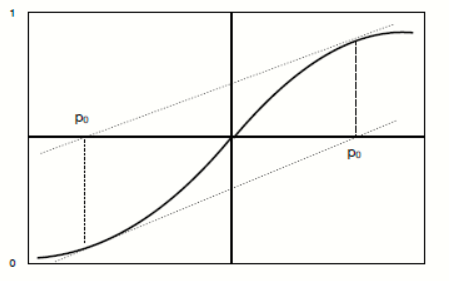



### Fixed-point iteration

- Many root-finding methods can be represented as the fixed-point iteration
- Put differently, the fixed-point iteration is a framework which nests other methods as special cases
- We will not discuss this method in depth and some basic concepts should suffice.

><div class="alert alert-block alert-info"> 
> <b>Root-finding problem:</b> Find $\theta^*$ such that $g(\theta^*) = 0$.<br>
> <b>Fixed-point problem:</b> Find $\theta^*$ such that $h(\theta^*) = \theta^*$.
</div>

- We can formulate a root-finding problem as a fixed-point problem, and vice versa. For
example, consider a root-finding problem of $g(\theta) = 0$.

- Define $h(\theta) = \theta-g(\theta)$.
- If $\theta^*$ is a fixed-point of $h(\theta)$, that is, $h(\theta^*) = \theta^* - g(\theta^*) = \theta^*$, then the result implies $g(\theta^*)=0$. It means $\theta^*$ is the root of $g(\theta)$.
- Thus, the root-finding problem of $g(\theta)$ is transformed to the fixed-point problem of $h(\theta)$, where $h(\theta) = \theta-g(\theta)$.

- So how exactly does the fixed-point method work? Let's demonstrate it graphically.

In [2]:
using Interact, WebIO, Plots

h_0(x) = x
h(x) = x/3 + 1
θ₀ = 4.5
θ₁ = h(θ₀)
θ₂ = h(θ₁)

@manipulate for i in (1,2,3,4,5,6)
    plot(size=(500,500), aspect_ratio=1, xlim=[0,5], ylim=[0,5], xlabel="θ", ylabel="h(θ)")
    plot!(h_0, label="h(θ)=θ")
    plot!(h, label="h(θ)")
    plot!(i >= 2 ? ([θ₀,θ₀], [-1,h_0(θ₀)+1]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([θ₀], [0], text(i >= 2 ? "θ₀" : "", 11))
    plot!(i >= 3 ? ([-1,θ₀], [h(θ₀),h(θ₀)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([0.1], [h(θ₀)+0.1], text(i >= 3 ? "h(θ₀)" : "", 10))
    plot!(i >= 4 ? ([θ₁,θ₁], [-1,h(θ₀)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([h(θ₀)], [0], text(i >= 4 ? "θ₁=h(θ₀)" : "", 8))
    plot!(i >= 5 ? ([-1,θ₁], [h(θ₁),h(θ₁)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([0.1], [h(θ₁)+0.1], text(i >= 5 ? "h(θ₁)" : "", 10))
    plot!(i >= 6 ? ([θ₂,θ₂], [-1,h(θ₁)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([θ₂], [0], text(i >= 6 ? "θ₂=h(θ₁)" : "", 8))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idMuYcukPc"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "idlXYc1tQJ"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idXw1U44LH"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "idL9hrDW8M"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "id70ePejnn"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "idWyTzArZn")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000071a90da0, Task (runnable) @0x0000000071a90da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n 

- Fixed-point iteration methods have a few appealing features, one of which is that the updating equation is rather straightforward:

\begin{equation}
  \theta_{i} = h(\theta_{i-1}).
\end{equation}

- If $h(\theta)$ satisfies certain properties (among them, $h'(\theta^*)<1$), then the iteration would converge in the numerical sense that $|\theta_{i} - \theta_{i-1}| < \varepsilon$.

- So, should we always convert a root-finding problem ($g(\theta)=0$) to a fixed-point problem ($h(\theta)=\theta$)?
    - Well, notice that the conversion is not unique: $h(\theta) = \theta - g(\theta)$ and $h(\theta) = \theta + 2g(\theta)$ both look like reasonable conversions
    - However, there is no guarantee that the converted $h(\theta)$ would satisfy the required properties and therefore no guarantee of convergence in the iteration
    - You have to choose the conversion function wisely.

- Note that the Newton's method can be treated as a fixed-point problem in which the conversion function is guaranteed to converge at least locally
- To see that the Newton's method is a fixed-point method, you only need to define the right-hand-side of Newton's updating equation to be $h(\theta_{i-1})$, then you have $\theta_i = h(\theta_{i-1})$ which is a fixed-point problem.